In [1]:
## Import necessary lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('dark_background')

# from google.colab.patches import cv2_imshow
import cv2
from PIL import Image

In [2]:
samp1 = './test_data/im1.jpeg'
samp2 = './test_data/im2.jpg'
samp3 = './test_data/im3_tiger.jpeg'
samp4 = './test_data/im4_bike.jpg'

## Read the image in cv2 and show it on plt and CV & Health Check of the image
## GrayScale ,Thresolding and Binarization  
## Rotation: Custom angle as per user requirements
- The scale factor in the cv2.getRotationMatrix2D() function is used to scale the image before rotating it. 

## Cropping Image:

## Resizing with a scaling factor

In [3]:
## Creating Main Class consists Read, Show, 
class Main:

    def __init__(self, imagePath):

        self.imagePath = imagePath

    ## Read the image and show it on matplotlib
    def readPlt(self):

        image = cv2.imread(self.imagePath, cv2.IMREAD_UNCHANGED)
        self.imageRaw = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        return self.imageRaw
    
     ## Read the image and show it on CV
    def readCV(self):

        self.imageRAW = cv2.imread(self.imagePath, cv2.IMREAD_UNCHANGED)

        return self.imageRAW

    ## Show the image in plt
    def showPlt(self,image):

        plt.figure(figsize=(15,12))
        plt.imshow(image)
        # plt.axis('off')
        plt.show()

    ## Show the image in CV2
    def showCV(self, image):

        cv2.imshow('Image', image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    ## Basic Health of the image
    def healthCheck(self,image):

        print('Here is the Basic Health Check of the Image')
        display('Type of the Image is:',type(image))
        display('Datatype of the Image:',image.dtype)
        display('Shape of the Image:',image.shape)


    ## Gray Scale conversion of the Image
    def gray(self,image):

        ## Approach-1: Read images in GrayScale
        # imgGray2 = cv2.imread(samp2, cv2.IMREAD_GRAYSCALE)
        
        ## Approach-2
        self.imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        return self.imageGray

    ## Binary Thresolding
    def binThres(self, image):

        ## Threshold the image to create a binary image  using Otsu’s Binarization

        self.Thresh, self.imgBinThres = cv2.threshold(image, 170, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        return self.imgBinThres

    ## Adaptive Thresolding
    def adpThres(self, image):

        # Apply adaptive thresholding with neighborhood pixels and C constant value 

        self.imgAdaptvThres = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                            cv2.THRESH_BINARY, 151,11)

        return self.imgAdaptvThres


    ## Resizing with scale factor
    def resize(self,image):

        ## As cv2 shape come up with height and width format
        height, width = image.shape[:2]
        scale_factor = float(input('Put the Scale Factor :')) 

        ## Resize the image as per the scale factpr
        new_width = int(width * scale_factor)
        new_height = int(height * scale_factor)
        new_size = (new_width, new_height)

        # Resize the image using the new dimensions
        self.imgScaled = cv2.resize(image, new_size, fx = 1.2, fy = 1.5, interpolation = cv2.INTER_LINEAR)

        ## fx: A scaling factor along the horizontal axis.
        ## fy: A scaling factor along the vertical axis.

        return self.imgScaled


    ## Rotation of the Image

    def rotation(self, image):
        
        ## Approach-1 

        ## getting the first two index of the tuple
        height, width = image.shape[:2]

        # Define the rotation angle in degrees
        angle = float(input('Put the angle of Rotation: '))

        #Calculate the scale factor
        scale_factor = 1.0  # default value i.e no scaling
        # if angle != 0:
        #     scale_factor = abs(math.cos(math.radians(angle))) + abs(math.sin(math.radians(angle)))

        # Calculate the rotation matrix
        center = (width / 2.0, height / 2.0)
        # Calculate the rotation matrix
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale_factor)

        # Perform the rotation
        self.imageRotated = cv2.warpAffine(image, rotation_matrix, (width, height))


        ## Approach-2 when rotate some specific angle

        # imageRotated = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)

        return self.imageRotated


    ## Cropping Image 

    def crop(self, image):

        # set the coordinates for the crop area (left, upper, right, lower)
        x, y, w, h = map(int, input("Enter left, upper, right, lower values: ").split())
        
        # x, y, w, h = 100, 100, 200, 200    ## for square

        # x and y represent the upper left corner of the crop area
        # w and h represent the width and height of the crop area

        # crop the image using NumPy array slicing
        self.imageCropped = image[y:y+h, x:x+w] # syntax [y_start:y_end, x_start:x_end]

        return self.imageCropped

In [4]:
## Creating Instances of the Image      *** ALL

imgLenM = Main(samp1)
imgNatM = Main(samp2)
imgTigM = Main(samp3)
imgBikeM = Main(samp4)


## Call and Read the Raw Images
imgLenRaw = imgLenM.readPlt()
imgNatRaw = imgNatM.readPlt()
imgTigRaw = imgTigM .readCV()
imgBikeRaw = imgBikeM.readCV()


--------- RAW IMAGES ----------
--------- LENSE ----------


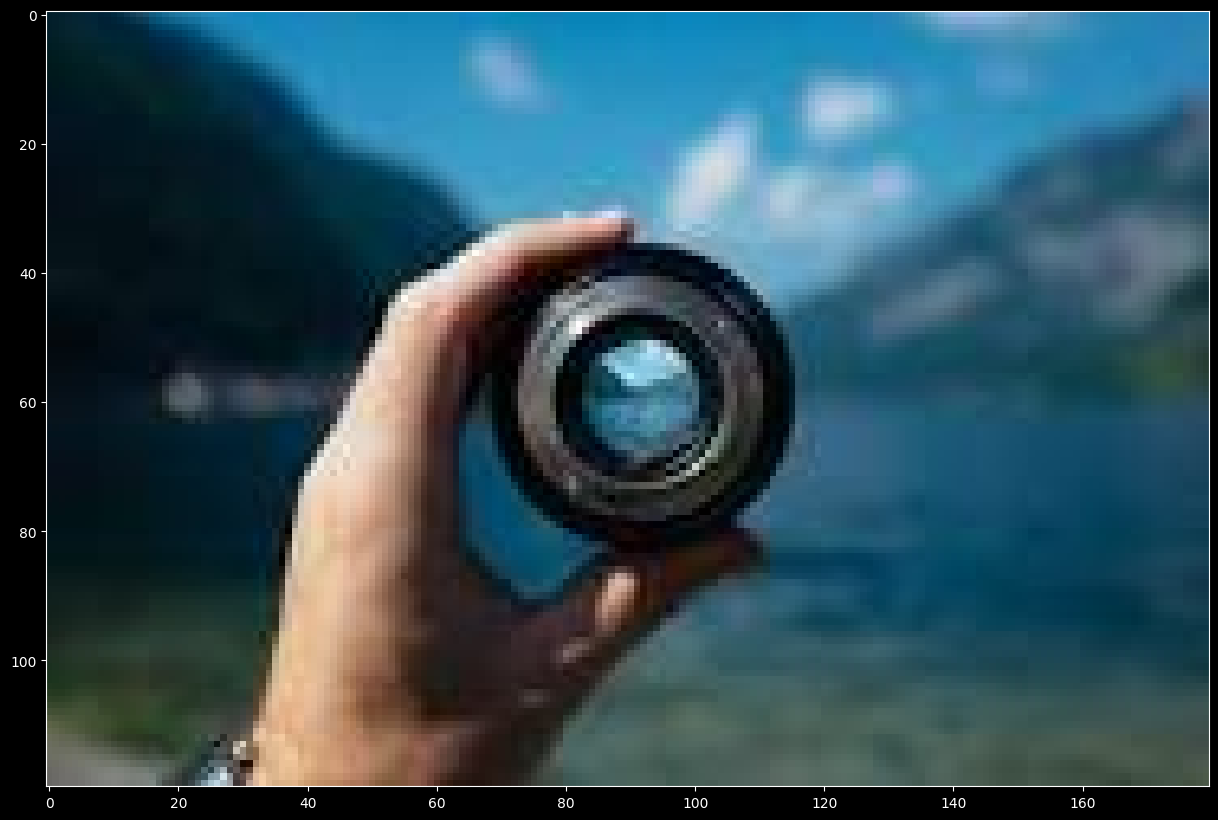

-------------------
Here is the Basic Health Check of the Image


'Type of the Image is:'

numpy.ndarray

'Datatype of the Image:'

dtype('uint8')

'Shape of the Image:'

(120, 180, 3)

--------- NATURE ----------


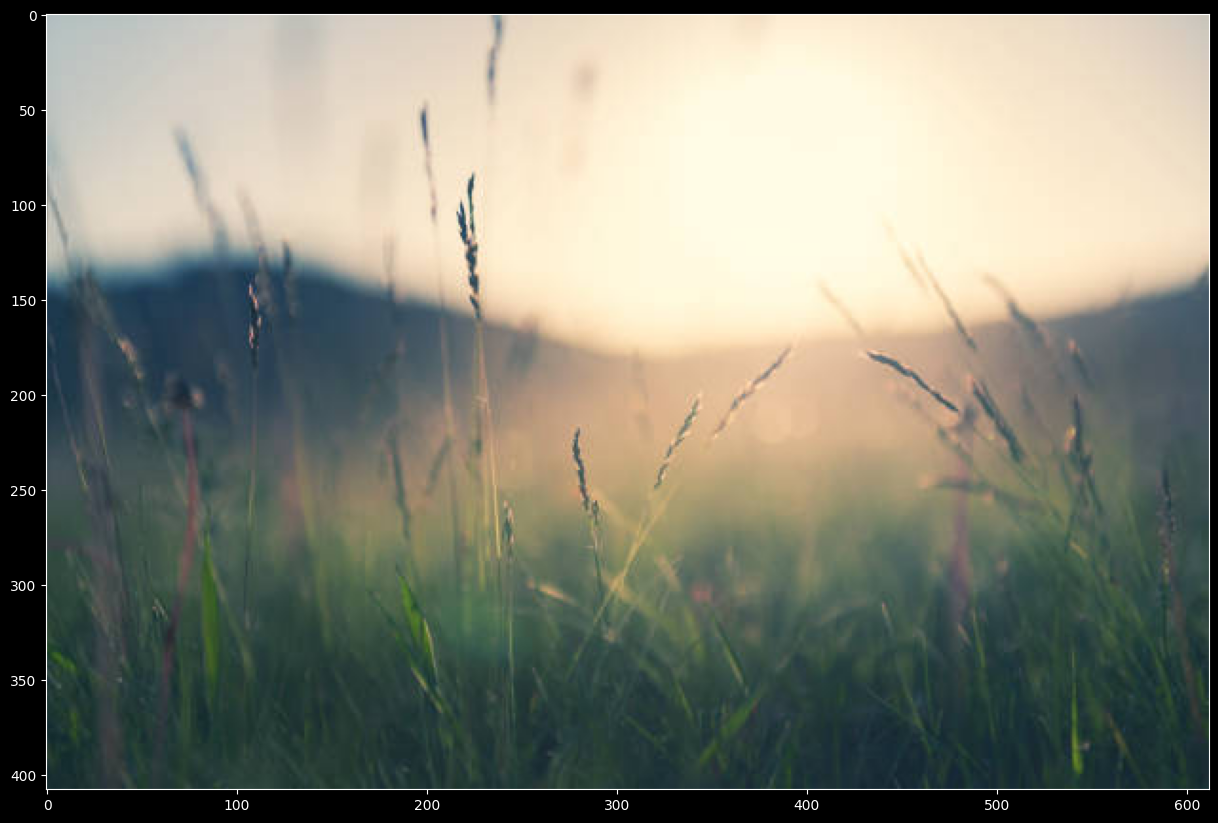

-------------------
Here is the Basic Health Check of the Image


'Type of the Image is:'

numpy.ndarray

'Datatype of the Image:'

dtype('uint8')

'Shape of the Image:'

(408, 612, 3)

---------- TIGER ---------
-------------------
Here is the Basic Health Check of the Image


'Type of the Image is:'

numpy.ndarray

'Datatype of the Image:'

dtype('uint8')

'Shape of the Image:'

(1500, 2292, 3)

--------- BIKE ----------
-------------------
Here is the Basic Health Check of the Image


'Type of the Image is:'

numpy.ndarray

'Datatype of the Image:'

dtype('uint8')

'Shape of the Image:'

(594, 1056, 3)

In [10]:
# Visualizing Raw Images    *** ALL
print('--------- RAW IMAGES ----------')

print('--------- LENSE ----------')
imgLenM.showPlt(imgLenRaw)
print('-------------------')
imgLenM.healthCheck(imgLenRaw)
print('--------- NATURE ----------')
imgNatM.showPlt(imgNatRaw)
print('-------------------')
imgNatM.healthCheck(imgNatRaw)
print('---------- TIGER ---------')
imgTigM.showCV(imgTigRaw)
print('-------------------')
imgTigM.healthCheck(imgTigRaw)
print('--------- BIKE ----------')
imgBikeM.showCV(imgBikeRaw)
print('-------------------')
imgBikeM.healthCheck(imgBikeRaw)

In [11]:
## Visualization of Gray Scale Image    ***BIKE

imgBikeGray = imgBikeM.gray(imgBikeRaw)

print('-------------Original--------------')
imgBikeM.showCV(imgBikeRaw)
print('-------------------')
imgBikeM.healthCheck(imgBikeRaw)

print('------------Gray Scale---------------')
# imgBikeM.showPlt(imgBikeGray)
imgBikeM.showCV(imgBikeGray)
print('-------------------')
imgBikeM.healthCheck(imgBikeGray)

-------------Original--------------
-------------------
Here is the Basic Health Check of the Image


'Type of the Image is:'

numpy.ndarray

'Datatype of the Image:'

dtype('uint8')

'Shape of the Image:'

(594, 1056, 3)

------------Gray Scale---------------
-------------------
Here is the Basic Health Check of the Image


'Type of the Image is:'

numpy.ndarray

'Datatype of the Image:'

dtype('uint8')

'Shape of the Image:'

(594, 1056)

-------------Original--------------


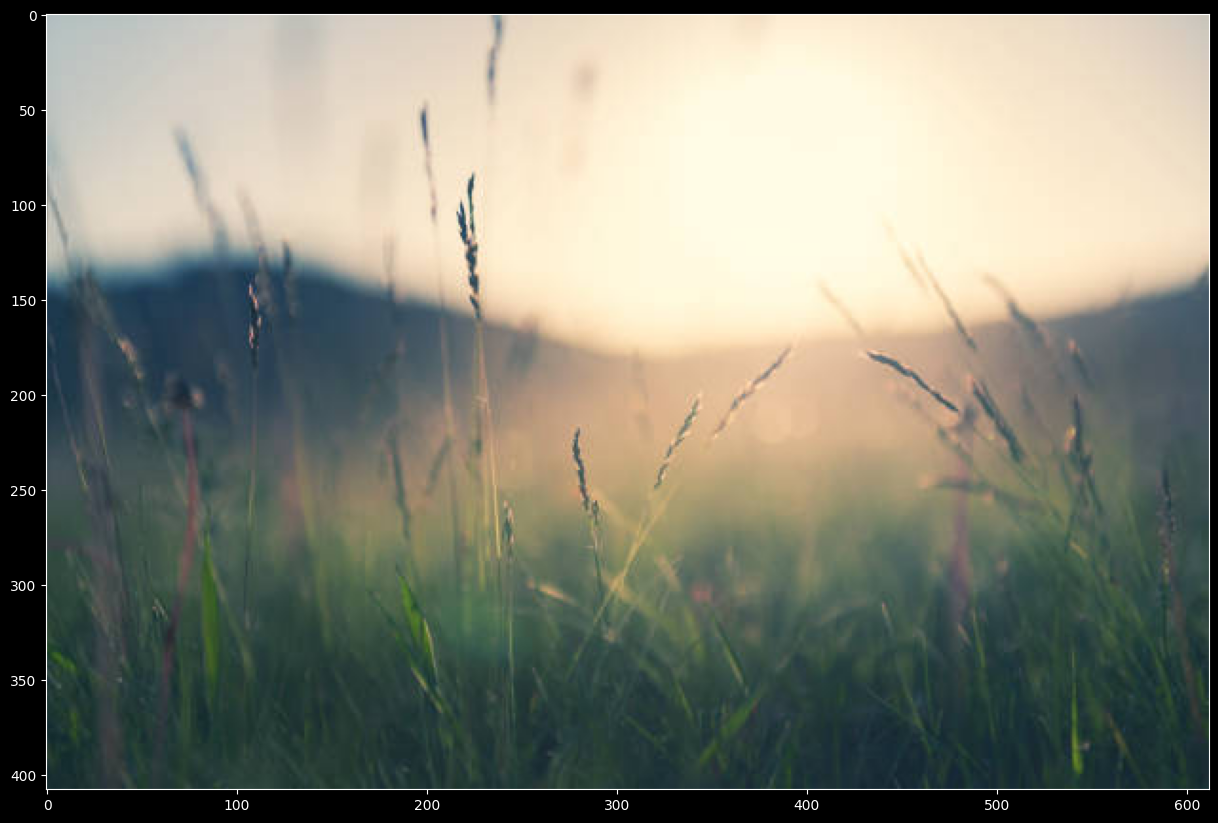

-------------------
Here is the Basic Health Check of the Image


'Type of the Image is:'

numpy.ndarray

'Datatype of the Image:'

dtype('uint8')

'Shape of the Image:'

(408, 612, 3)

------------ Binary Thresolding ---------------
-------------------
Here is the Basic Health Check of the Image


'Type of the Image is:'

numpy.ndarray

'Datatype of the Image:'

dtype('uint8')

'Shape of the Image:'

(408, 612)

In [12]:
## Visualization of Binary Image both using OTSU and Adaptive         *** NATURE

imgNatGray = imgNatM.gray(imgNatRaw)

imgNatBinThres = imgNatM.binThres(imgNatGray)

imgNatAdapThres = imgNatM.adpThres(imgNatGray)

print('-------------Original--------------')
imgNatM.showPlt(imgNatRaw)
print('-------------------')
imgNatM.healthCheck(imgNatRaw)

print('------------ Binary Thresolding ---------------')
# imgNatM.showPlt(imgNatBinThres)
imgNatM.showCV(imgNatBinThres)
print('-------------------')
imgNatM.healthCheck(imgNatBinThres)

# print('------------ Adaptive Thresolding ---------------')
# # imgNatM.showPlt(imgNatBinThres)
# imgNatM.showCV(imgNatAdapThres)
# print('-------------------')
# imgNatM.healthCheck(imgNatAdapThres)

-------------Original--------------


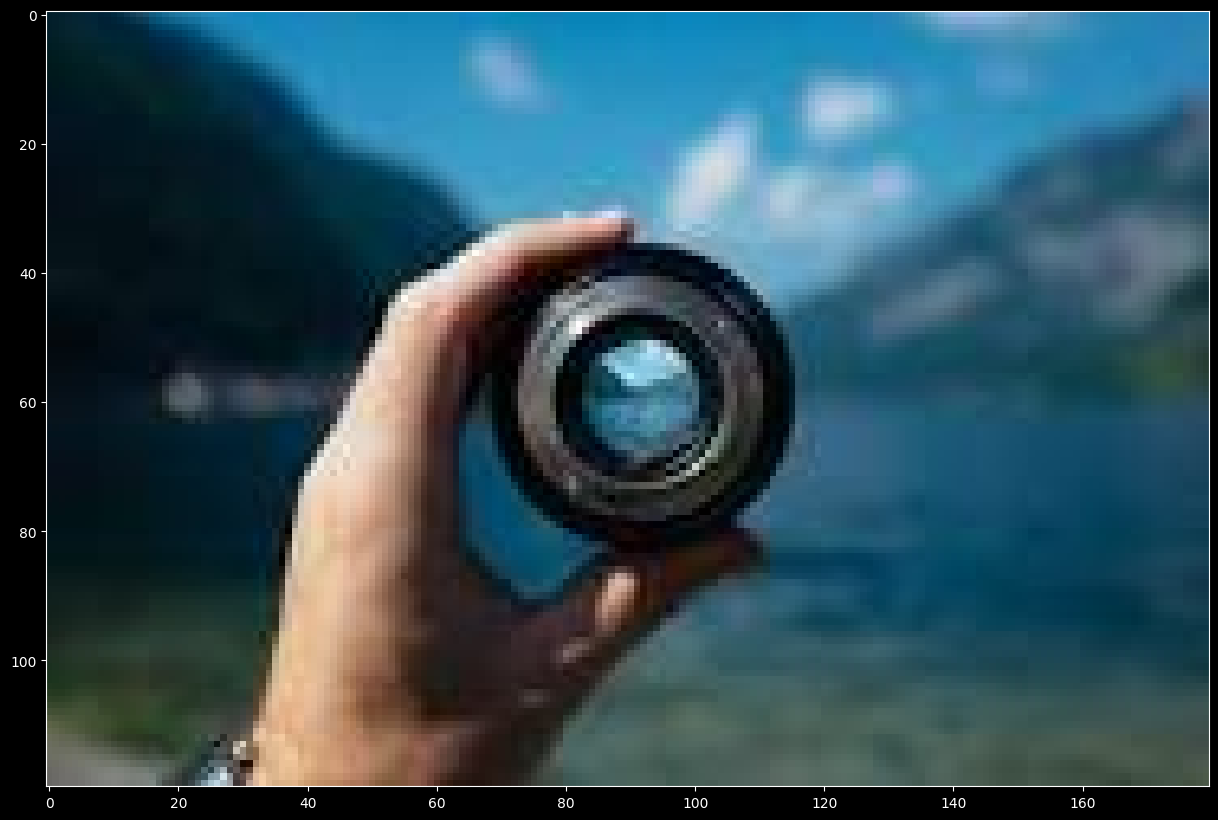

-------------------
Here is the Basic Health Check of the Image


'Type of the Image is:'

numpy.ndarray

'Datatype of the Image:'

dtype('uint8')

'Shape of the Image:'

(120, 180, 3)

------------After Resizing---------------
-------------------
Here is the Basic Health Check of the Image


'Type of the Image is:'

numpy.ndarray

'Datatype of the Image:'

dtype('uint8')

'Shape of the Image:'

(480, 720, 3)

In [13]:
## Resizing the image           *** LENSE

imgLenResized = imgLenM.resize(imgLenRaw)

print('-------------Original--------------')
imgLenM.showPlt(imgLenRaw)
print('-------------------')
imgLenM.healthCheck(imgLenRaw)


print('------------After Resizing---------------')
imgLenM.showCV(imgLenResized)
print('-------------------')
imgLenM.healthCheck(imgLenResized)

## Blurring & Edge Detection


In [14]:
## Formed class for Image Blur
class ImageBlur:

    def __init__(self, image, kernel):
        # print('Called Successfully')
        self.image = image
        self.kernel = kernel
        self.kernel_size = (self.kernel, self.kernel)
        print('Choose Any Blur Method')
        print('Average blurring/AvBlur, Gaussian Blur/GaBlur, Median Blur/ MdBlur, Bilateral Blur/BiBlur')

    ## Average Blur
    def avBlur(self):

        self.imageAvblurred = cv2.blur(self.image, self.kernel_size)

        return self.imageAvblurred
    
    ## Gaussian Blur
    def gaBlur(self, sigmaX, sigmaY):

        # self.sigmaX = sigmaX
        # self.sigmaY = sigmaY
        self.imageGablurred = cv2.GaussianBlur(self.image, self.kernel_size, sigmaX, sigmaY, cv2.BORDER_DEFAULT)

        return self.imageGablurred
    ## list of parameters
    # sigmaX and sigmaY are  Std Dev along X & Y direction i.e. horizontal & Vertical direction respectively
    # i.e how much blur in required in x and y direction
    # more increase the value of sigmaX and Y more blur and vice versa
    # defalut value is 0
    # borderType- It specifies how to handle border pixels when applying the filter.
    # As a general rule of thumb, values of sigmaX and sigmaY between 0.5 and 3 are commonly used for Gaussian blurring. 
    # However, the optimal values may vary depending on the image content and the level of smoothing desired.
        
    
    ## Median Blur
    def medBlur(self):
        
        self.imageMedblurred = cv2.medianBlur(self.image, self.kernel)
    
        return self.imageMedblurred


    ## Bilateral Blur
    # In contrast to other blurring techniques, such as Gaussian blurring, bilateral blurring 
    # considers the difference in color or intensity values between pixels, 
    # so it can better preserve edges and fine details in the image.

    def bilatBlur(self, d, sigmaColor, sigmaSpace):
        
        self.imageBilatblurred = cv2.bilateralFilter(self.image, d, sigmaColor, sigmaSpace, cv2.BORDER_DEFAULT)
        return self.imageBilatblurred
        
        ## parameters
        # d = diameters, This value should be positive and odd. 
        # Larger values of d means that farther pixels will influence the blurring.
        # sigmaColor = Std Dev in color space. Larger values of sigmaColor means that more 
        # colors will be treated as the same and thus results in more blurring.
        # sigmaSpace = Std Dev of the Gaussian function in the coordinate space. 
        
    





In [15]:
## Creating instance to check Blur

img_blur = ImageBlur(imgTigRaw, 5)
imgTigBlurredAV = img_blur.avBlur()
imgTigBlurredGA = img_blur.gaBlur(500,200)
imgTigBlurredMED = img_blur.medBlur()
imgTigBlurredBILT = img_blur.bilatBlur(25 ,200, 200)

Choose Any Blur Method
Average blurring/AvBlur, Gaussian Blur/GaBlur, Median Blur/ MdBlur, Bilateral Blur/BiBlur


In [20]:
# ## Visualisation                                    *** for Tiger
# print('------------Original Blurring---------------')
# imgLenM.showCV(imgTigRaw)
# imgLenM.healthCheck(imgTigRaw)

# print('------------Average Blurring---------------')
# imgLenM.showCV(imgTigBlurredAV)
# imgLenM.healthCheck(imgTigBlurredAV)

# print('------------Gaussian Blurring---------------')
# imgLenM.showCV(imgTigBlurredGA)
# imgLenM.healthCheck(imgTigBlurredGA)

# print('------------Median Blurring---------------')
# imgLenM.showCV(imgTigBlurredMED)
# imgLenM.healthCheck(imgTigBlurredMED)

# print('------------Bilateral Blurring---------------')
# imgLenM.showCV(imgTigBlurredBILT)
# imgLenM.healthCheck(imgTigBlurredBILT)

In [19]:
## Edge detection Class which contain Canny, Sobel and Laplacian

class EdgeDetect:

    def __init__(self, imageBlr):
        
        self.imageBlr = imageBlr

    # Using Canny Edge Detector
    def edgeCanny(self):

        self.imageEdgedCanny = cv2.Canny(self.imageBlr, 10,100)  ## passing only two thresold value
        # self.imageEdgedCanny = imageEdgedCanny

        return self.imageEdgedCanny

    ## Using Sobel Operator or 1st order derivative
    def edgeSobel(self, kernel):

        # ## Gaussian Blur
        # ImageBlur.gaBlur(15,15)


        # Apply the Sobel operator in the x and y directions
        self.sobel_x = cv2.Sobel(self.imageBlr, cv2.CV_64F, 1, 0, ksize=kernel)
        self.sobel_y = cv2.Sobel(self.imageBlr, cv2.CV_64F, 0, 1, ksize=kernel)


        # Combine the gradients to obtain the magnitude
        magnitude = cv2.magnitude(self.sobel_x, self.sobel_y)

        self.imageEdgedSobel = magnitude

        return self.imageEdgedSobel

    ## Using Laplacian or second order derivative

    def edgeLap(self):

        # ImageBlur.gaBlur(15,15)
        self.imageEdgedLap = cv2.Laplacian(self.imageBlr,cv2.CV_64F)

        return self.imageEdgedLap

In [23]:
## Edge Detection
# S-1 Raw to grayscale
imgBikeGray = imgBikeM.gray(imgBikeRaw)

# S-2 GrayScale to Blur

imgBikeBlurObj = ImageBlur(imgBikeGray, 5)   # image and kernel value
imgBikeBlurredGA = imgBikeBlurObj.gaBlur(5,5) # sigmaX and sigmaY value
# S-3 Edge Detection

imgBikeEdgeObj = EdgeDetect(imgBikeBlurredGA)
imgBikeEdgedCanny = imgBikeEdgeObj.edgeCanny()


## Visualisation                                    *** for Tiger
print('------------Original Image---------------')
imgLenM.showCV(imgBikeRaw)
imgLenM.healthCheck(imgBikeRaw)

print('------------ Edge Detection Canny---------------')
imgLenM.showCV(imgBikeEdgedCanny)
imgLenM.healthCheck(imgBikeEdgedCanny)

Choose Any Blur Method
Average blurring/AvBlur, Gaussian Blur/GaBlur, Median Blur/ MdBlur, Bilateral Blur/BiBlur


## Edge Detection Importants
- Edge detection is the process of locating edges in an image. An edge is typically an abrupt transition from a pixel value of one color to another, such as from black to white.

#### Canny Edge Detector:
- It is one of the most popular techniques for edge detection, not just because of its simplicity, but also because it generates high-quality results.
- The Canny edge detector algorithm has four steps/stages:

    - Noise reduction by blurring the image using a Gaussian blur (smoothing the image).
    - Computing the intensity gradients of the image i.e calculating the gradient magnitude and direction.
    - non-maximum Suppression of Edges.
    - Using hysteresis thresholding.

- cv2.Canny() has parameters used 
    - image: This is the input image, which can be a grayscale or a color image.

    - threshold1: This is the lower threshold value for the hysteresis thresholding step. Any edge with a gradient magnitude greater than this threshold is considered a strong edge.

    - threshold2: This is the upper threshold value for the hysteresis thresholding step. Any edge with a gradient magnitude less than this threshold is discarded, and any edge with a gradient magnitude between the two thresholds is considered a weak edge.

    - apertureSize: This is the size of the Sobel kernel used for gradient calculation. It can be set to 3, 5, or 7.

    - L2gradient: This is a Boolean flag that determines whether to use the L2 norm (Euclidean distance) for gradient magnitude calculation. If set to True, the L2 norm is used, which is more accurate but slower. If set to False, the L1 norm (absolute value) is used, which is faster but less accurate.

    - borderType: This is an optional parameter that determines how to handle image borders. It can be set to cv2.BORDER_DEFAULT, cv2.BORDER_CONSTANT, cv2.BORDER_REPLICATE, or cv2.BORDER_WRAP.

    - gradient: This is an optional output parameter that stores the gradient magnitude of the edges.

    - edges: This is the output image, which contains the detected edges.




#### Sobel Edge Detector:
- Sobel edge detector is a gradient based method based on the first order derivatives. It calculates the first derivatives of the image separately for the X and Y axes.
- cv2.Sobel() takes parameters src, ddepth, dx, dy, ksize, scale, delta, borderType
        - src: The input image.
        - ddepth: The depth of the output image. Set it to -1 to use the same depth as the input image.
        - dx: The order of the derivative in the x direction (1, 2, or 3).
        - dy: The order of the derivative in the y direction (1, 2, or 3).
        - ksize: The size of the Sobel kernel. Set it to 1, 3, 5, or 7.
        - scale: The optional scale factor for the computed derivative values. By default, it is set to 1.
        - delta: The optional bias added to the computed derivative values. By default, it is set to 0.
        - borderType: The border mode used to extrapolate pixels outside the image. By default, it is set to cv2.BORDER_DEFAULT.
    - ** Note that dx and dy must be either 0 or 1, and at least one of them must be non-zero. Additionally, if ddepth is set to cv2.CV_16S or cv2.CV_64F
    - A value of 0 for dx or dy indicates that no derivative is taken in that direction. This means that the Sobel operator will only compute the derivative in one direction (either horizontal or vertical), and the resulting image will only show edges in that direction.

- A value of 1 for dx or dy indicates that a first-order derivative is taken in that direction. This means that the Sobel operator will compute both the horizontal and vertical derivatives, and the resulting image will show edges in both directions.

- In summary, by setting dx and dy to 0 or 1, we can control the direction of the edge detection and obtain either vertical or horizontal edges or both.
- sobel_x image represents the edges in the horizontal direction, while the sobel_y image represents the edges in the vertical direction.
#### Laplacian 

## Contour Detection

- Technique used to detect the boundaries of objects within an image. The technique involves analyzing the variations of brightness or color in an image and finding the edges or boundaries where these variations occur. These boundaries can then be used to identify and extract objects from an image.

- There are several methods for contour detection, including edge detection, thresholding, and gradient-based methods.

In [27]:
## Contour Detection function

def contour(image_raw, imageEd):

    # define a (3, 3) structuring element
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))


    # apply the dilation operation to the edged image
    imgDilate = cv2.dilate(imageEd, kernel, iterations=1)

    # find the contours in the edged image
    contours, hierarchy = cv2.findContours(imgDilate, cv2.RETR_TREE, 
                                           cv2.CHAIN_APPROX_SIMPLE)
    image_raw_copy = image_raw.copy()
    # draw the contours on a copy of the original image
    cv2.drawContours(image_raw, contours, -1, (0, 255, 0), 3)
    
    cv2.imshow('Contours', image_raw_copy)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

        

In [28]:
## Edge Detection
# S-1 Raw to grayscale
imgBikeGray = imgBikeM.gray(imgBikeRaw)

# S-2 GrayScale to Blur

imgBikeBlurObj = ImageBlur(imgBikeGray, 5)   # image and kernel value
imgBikeBlurredGA = imgBikeBlurObj.gaBlur(5,5) # sigmaX and sigmaY value
# S-3 Edge Detection

imgBikeEdgeObj = EdgeDetect(imgBikeBlurredGA)
imgBikeEdgedCanny = imgBikeEdgeObj.edgeCanny()

contour(imgBikeRaw, imgBikeEdgedCanny)

Choose Any Blur Method
Average blurring/AvBlur, Gaussian Blur/GaBlur, Median Blur/ MdBlur, Bilateral Blur/BiBlur


In [29]:
# ## Creating Bounding Box

# def drawBbox(image_raw, bbox, color=(0, 255, 0), thickness=2):
#     """
#     Draws a bounding box on an image.
    
#     Args:
#         image (numpy.ndarray): The image to draw the bounding box on.
#         bbox (tuple): The bounding box coordinates as a tuple of (x, y, w, h).
#         color (tuple): The color of the bounding box as a BGR tuple. Defaults to green.
#         thickness (int): The thickness of the bounding box border. Defaults to 2.
    
#     Returns:
#         numpy.ndarray: The image with the bounding box drawn.
#     """
#     x, y, w, h = bbox
#     cv2.rectangle(image_raw, (x, y), (x+w, y+h), color, thickness)
#     return image_raw


# # Define the coordinates of the bounding box
# bbox = (100, 100, 200, 200)

# # Draw the bounding box on the image using the custom function
# image_with_bbox = drawBbox(imgTigRaw, bbox)


# print('------------ Bbox ---------------')
# imgTigM.showCV(image_with_bbox)
# imgTigM.healthCheck(image_with_bbox)


In [ ]:
## Skew Correction for Text only

def deskew(image_raw,imageEdge):
    """
    Corrects the skew of an image.
    
    Args:
        image (numpy.ndarray): The image to correct the skew of.
        
    Returns:
        numpy.ndarray: The image with the skew corrected.
    """
    # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(imageEdge, 1, np.pi/180, 200)

    # Calculate the angle of the most prominent line
    angles = []
    for line in lines:
        rho, theta = line[0]
        if abs(theta - np.pi/2) > 0.1:
            angle = (theta - np.pi/2)*180/np.pi
            angles.append(angle)

    # Rotate the image to correct the skew
    if len(angles) > 0:
        median_angle = np.median(angles)
        rows, cols = image_raw.shape[:2]
        M = cv2.getRotationMatrix2D((cols/2, rows/2), -median_angle, 1)
        imageDeskw = cv2.warpAffine(image_raw, M, (cols, rows), flags=cv2.INTER_CUBIC)

    return imageDeskw


In [ ]:
# Correct the skew of the image using the custom function
deskewed_image = deskew(image)

In [ ]:
import math
from typing import Tuple, Union

import cv2
import numpy as np

from deskew import determine_skew


def rotate(
        image: np.ndarray, angle: float, background: Union[int, Tuple[int, int, int]]
) -> np.ndarray:
    old_width, old_height = image.shape[:2]
    angle_radian = math.radians(angle)
    width = abs(np.sin(angle_radian) * old_height) + abs(np.cos(angle_radian) * old_width)
    height = abs(np.sin(angle_radian) * old_width) + abs(np.cos(angle_radian) * old_height)

    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    rot_mat[1, 2] += (width - old_width) / 2
    rot_mat[0, 2] += (height - old_height) / 2
    return cv2.warpAffine(image, rot_mat, (int(round(height)), int(round(width))), borderValue=background)

image = cv2.imread('input.png')
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
angle = determine_skew(grayscale)
rotated = rotate(image, angle, (0, 0, 0))
cv2.imwrite('output.png', rotated)

In [ ]:
## sample -3
import cv2
import numpy as np
from scipy.ndimage import interpolation as inter

def correct_skew(image, delta=1, limit=5):
    def determine_score(arr, angle):
        data = inter.rotate(arr, angle, reshape=False, order=0)
        histogram = np.sum(data, axis=1, dtype=float)
        score = np.sum((histogram[1:] - histogram[:-1]) ** 2, dtype=float)
        return histogram, score

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1] 

    scores = []
    angles = np.arange(-limit, limit + delta, delta)
    for angle in angles:
        histogram, score = determine_score(thresh, angle)
        scores.append(score)

    best_angle = angles[scores.index(max(scores))]

    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, best_angle, 1.0)
    corrected = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, \
            borderMode=cv2.BORDER_REPLICATE)

    return best_angle, corrected

if __name__ == '__main__':
    image = cv2.imread('1.png')
    angle, corrected = correct_skew(image)
    print('Skew angle:', angle)
    cv2.imshow('corrected', corrected)
    cv2.waitKey()

In [ ]:
# denoising of image saving it into dst image 
imgDenoise1 = cv2.fastNlMeansDenoising(imgGray, None, 10, 10, 7, 15)   ## dimension issue
imgDenoise1 = imgDenoise1.astype("uint8") 
# dst = cv2.fastNlMeansDenoisingColored(img_norm0, None, 10, 10, 7, 15) ## None: as we are using colored image
# dst = cv2.fastNlMeansDenoisingColored(imgGray, None, 10, 10, 7, 15) 
# Plotting of source and destination image 
# plt.subplot(121), plt.imshow(imageG) 
# plt.subplot(122), plt.imshow(imgDenoise1) 
# plt.show()
plt.figure(figsize=(15,12))
plt.imshow(imgDenoise1)
plt.title('Noise Remove')
plt.show()
## applying 

In [ ]:
## OLD CODE
# *** ## Read the image and show it on matplotlib
# def read(path):

#     image = cv2.imread(path, cv2.IMREAD_UNCHANGED)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#     return image

# ## Show the image in plt
# def showPlt(image):


#     plt.figure(figsize=(15,12))
#     plt.imshow(image)
#     # plt.axis('off')
#     plt.show()

# ## Show the image in CV2
# def showCV(image):

#     cv2.imshow('Image', image)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

# ## Basic Health of the image
# def healthCheck(image):
#     print('Here is the Basic Health Check of the Image')
#     display('Type of the Image is:',type(image))
#     display('Datatype of the Image:',image.dtype)
#     display('Shape of the Image:',image.shape)


# ## ** Call and Show the Image
# imgLen = read(samp1)
# imgNat = read(samp2)
# imgTig = read(samp3)
# imgBike = read(samp4)





# # ** Visualizing Raw Images
# print('--------- RAW IMAGES ----------')

# print('--------- LENSE ----------')
# showPlt(imgLen)
# print('-------------------')
# healthCheck(imgLen)
# print('--------- NATURE ----------')
# showPlt(imgNat)
# print('-------------------')
# healthCheck(imgNat)
# print('---------- TIGER ---------')
# showPlt(imgTig)
# print('-------------------')
# healthCheck(imgTig)
# print('--------- BIKE ----------')
# showPlt(imgBike)
# print('-------------------')
# healthCheck(imgBike)
# print('-------------------')




# ## Gray Scale conversion of the Image
# def gray(image):
#     ## Approach-1: Read images in GrayScale
#     # imgGray2 = cv2.imread(samp2, cv2.IMREAD_GRAYSCALE)
#     ## Approach-2
#     imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     return imageGray

# def binThres(image):

#     ## Threshold the image to create a binary image  using Otsu’s Binarization

#     Thresh, imgBinThres = cv2.threshold(image, 170, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#     return imgBinThres

# def adpThres(image):

#     # Apply adaptive thresholding with neighborhood pixels and C constant value 

#     imgAdaptvThres = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
#                                         cv2.THRESH_BINARY, 151,11)

#     return imgAdaptvThres


# ## Resizing with scale factor

# def resize(image):

#     ## As cv2 shape come up with height and width format
#     height, width = image.shape[:2]
#     scale_factor = float(input('Put the Scale Factor :')) 

#     ## Resize the image as per the scale factpr
#     new_width = int(width * scale_factor)
#     new_height = int(height * scale_factor)
#     new_size = (new_width, new_height)

#     # Resize the image using the new dimensions
#     imgScaled = cv2.resize(image, new_size, fx = 1.2, fy = 1.5, interpolation = cv2.INTER_LINEAR)

#     ## fx: A scaling factor along the horizontal axis.
#     ## fy: A scaling factor along the vertical axis.

#     return imgScaled





# imgBikeGray = gray(imgBike)
# print('-------------Original--------------')
# showPlt(imgBike)

# print('------------Gray Scale---------------')
# showPlt(imgBikeGray)
# healthCheck(imgBikeGray)

# imgNatGray = gray(imgNat)

# print('-------------Original--------------')
# showPlt(imgNat)

# print('------------Gray Scale---------------')
# showPlt(imgNatGray)
# healthCheck(imgNatGray)




# ## *** Resizing the Lense image
# print('-------------Original--------------')
# showPlt(imgLen)
# healthCheck(imgLen)

# print('------------After Resizing---------------')
# imgLenResized = resize(imgLen)
# showPlt(imgLenResized)
# healthCheck(imgLenResized)



# ## Resizing the Lense image
# print('-------------Original--------------')
# showPlt(imgLen)
# healthCheck(imgLen)

# print('------------After Resizing---------------')
# imgLenResized = resize(imgLen)
# showPlt(imgLenResized)
# healthCheck(imgLenResized)



# ## Rotation of the Image
# def rotation(image):
    
#     ## Approach-1 

#     ## getting the first two index of the tuple
#     height, width = image.shape[:2]

#     # Define the rotation angle in degrees
#     angle = float(input('Put the angle of Rotation: '))

#     #Calculate the scale factor
#     scale_factor = 1.0  # default value i.e no scaling
#     # if angle != 0:
#     #     scale_factor = abs(math.cos(math.radians(angle))) + abs(math.sin(math.radians(angle)))

#     # Calculate the rotation matrix
#     center = (width / 2.0, height / 2.0)
#     # Calculate the rotation matrix
#     rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale_factor)

#     # Perform the rotation
#     imageRotated = cv2.warpAffine(image, rotation_matrix, (width, height))


#     ## Approach-2 when rotate some specific angle

#     # imageRotated = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)

#     return imageRotated




# print('------------After Rotation---------------')
# imgLenRotated = rotation(imgLenResized)
# showPlt(imgLenRotated)
# healthCheck(imgLenRotated)




# ## Cropping Image 

# def crop(image):

#     # set the coordinates for the crop area (left, upper, right, lower)
#     x, y, w, h = map(int, input("Enter left, upper, right, lower values: ").split())
    
#     # x, y, w, h = 100, 100, 200, 200    ## for square

#     # x and y represent the upper left corner of the crop area
#     # w and h represent the width and height of the crop area

#     # crop the image using NumPy array slicing
#     imageCropped = image[y:y+h, x:x+w] # syntax [y_start:y_end, x_start:x_end]

#     return imageCropped




# print('------------After Cropping---------------')
# imgLenCropped = crop(imgLenResized)
# showPlt(imgLenCropped)
# healthCheck(imgLenCropped)
